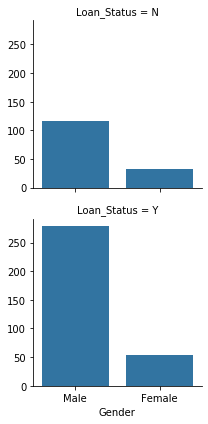

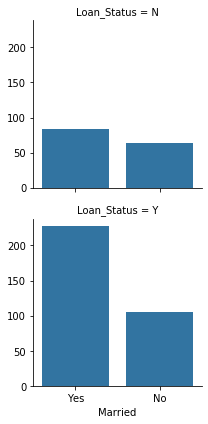

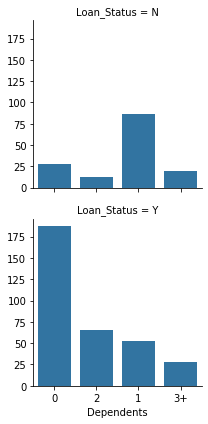

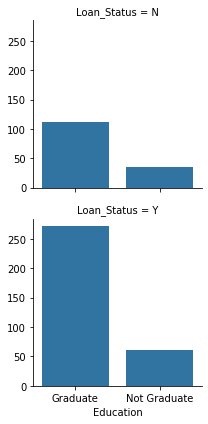

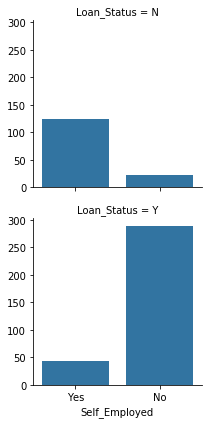

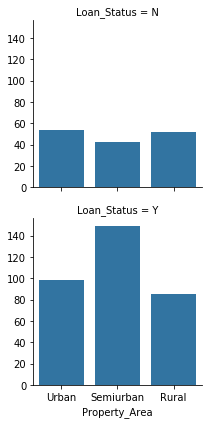

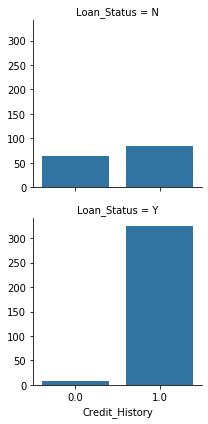

In [124]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

j="B:\\MLtried\\train.csv"
df=pd.read_csv(j)
df=df.drop("Loan_ID",axis=1)
df.dropna(inplace=True)
#getting categorical colums
dfcat=[x for x in df.columns[:-1] if (df[x].dtype=="object")]

#plots to get corellation
for i in dfcat :
   pict=sns.FacetGrid(df,"Loan_Status")
   pict.map(sns.countplot,i)
 
#getting numerical
    
dfnlm=df.drop(df[dfcat],axis = 1)
dfnlm=dfnlm.drop("Loan_Status",axis = 1)

# plot for credit history and loan
pict1=sns.FacetGrid(df,"Loan_Status")
pict1.map(sns.countplot,"Credit_History")





In [154]:
categorical=df.loc[:,df.dtypes=="object"]

# categorical to numerrical
def categorize(df):
    df.Gender.replace({'Male': 1, 'Female': 0}, inplace = True)
    df.Married.replace({'Yes': 1, 'No': 0}, inplace = True)
    df.Education.replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
    df.Self_Employed.replace({'Yes': 1, 'No': 0}, inplace = True)
    df = df.join(pd.get_dummies(df.Dependents, prefix='Dependents'))
    df.drop(columns= ['Dependents', 'Dependents_3+'], inplace=True)
    df = df.join(pd.get_dummies(df.Property_Area, prefix='Property_Area'))
    df.drop(columns= ['Property_Area', 'Property_Area_Rural'], inplace=True)
    return df


categorical = categorize(categorical)

dfcom=pd.concat([categorical,dfnlm],axis=1)
y=dfcom["Loan_Status"]
y.replace({'Y': 1, 'N': 0}, inplace = True)
dfcom=dfcom.drop("Loan_Status",axis=1)
x=dfcom


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print ("X_train, X_test, y_train, y_test ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)


X_train, X_test, y_train, y_test  (384, 14) (96, 14) (384,) (96,)


168    0
416    0
612    1
325    0
408    0
      ..
57     0
356    1
68     1
266    1
88     1
Name: Loan_Status, Length: 384, dtype: int64

In [325]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

linear=LinearRegression()
linear.fit(X_train,y_train)
linear_predict=linear.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': linear_predict})
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, linear_predict))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, linear_predict))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_predict)))


logistic=LogisticRegression(random_state=0).fit(X_train,y_train)
logistic_prediccted=logistic.predict(X_test)
logistic_accuracy=accuracy_score(y_test, logistic_prediccted)

support=SVC(C=1.0).fit(X_train,y_train)
support_predict=support.predict(X_test)
support_accuracy=accuracy_score(y_test, support_predict)

bayes=GaussianNB()
bayes.fit(X_train,y_train)
bayes_predict=bayes.predict(X_test)
bayes_accuracy=accuracy_score(y_test, bayes_predict)

tree=DecisionTreeClassifier(random_state=0, max_depth=2).fit(X_train,y_train)
tree_predict=tree.predict(X_test)
tree_accuracy=accuracy_score(y_test, tree_predict)

forest = RandomForestClassifier(max_depth=2, random_state=1)
forest.fit(X_train,y_train)
forest_predict=forest.predict(X_test)
forest_accuracy=accuracy_score(y_test, forest_predict)



bagg=BaggingClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100, random_state=0).fit(X_train,y_train)
bagg_predict=bagg.predict(X_test)
bagg_accuracy=accuracy_score(y_test, bagg_predict)




boost= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,learning_rate=0.5, random_state=0)
boost.fit(X_train,y_train)
boost_predict=boost.predict(X_test)
boost_accuracy=accuracy_score(y_test, boost_predict)

print ( "LogisticRegression accuracy : ",logistic_accuracy)
print ("Support Vactor accuracy : ",support_accuracy)
print ("bayes accuracy : ",bayes_accuracy)
print ("DecisionTree accuracy : ",tree_accuracy)
print ("RandomForest accuracy : ",forest_accuracy)
print ("BaggingClassifier accuracy : ",bagg_accuracy)
print ("BoostClassifier accuracy : ",boost_accuracy)

LogisticRegression accuracy :  0.8020833333333334
Support Vactor accuracy :  0.6875
bayes accuracy :  0.78125
DecisionTree accuracy :  0.7916666666666666
RandomForest accuracy :  0.7916666666666666
BaggingClassifier accuracy :  0.7916666666666666
BoostClassifier accuracy :  0.8020833333333334
